In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [5]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


In [6]:
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

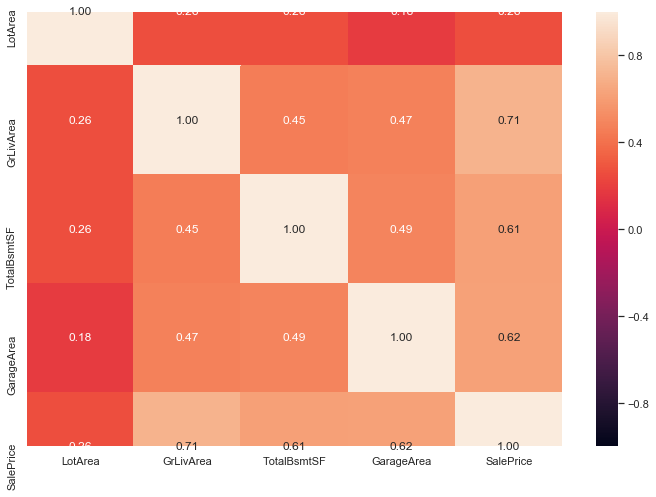

In [8]:
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

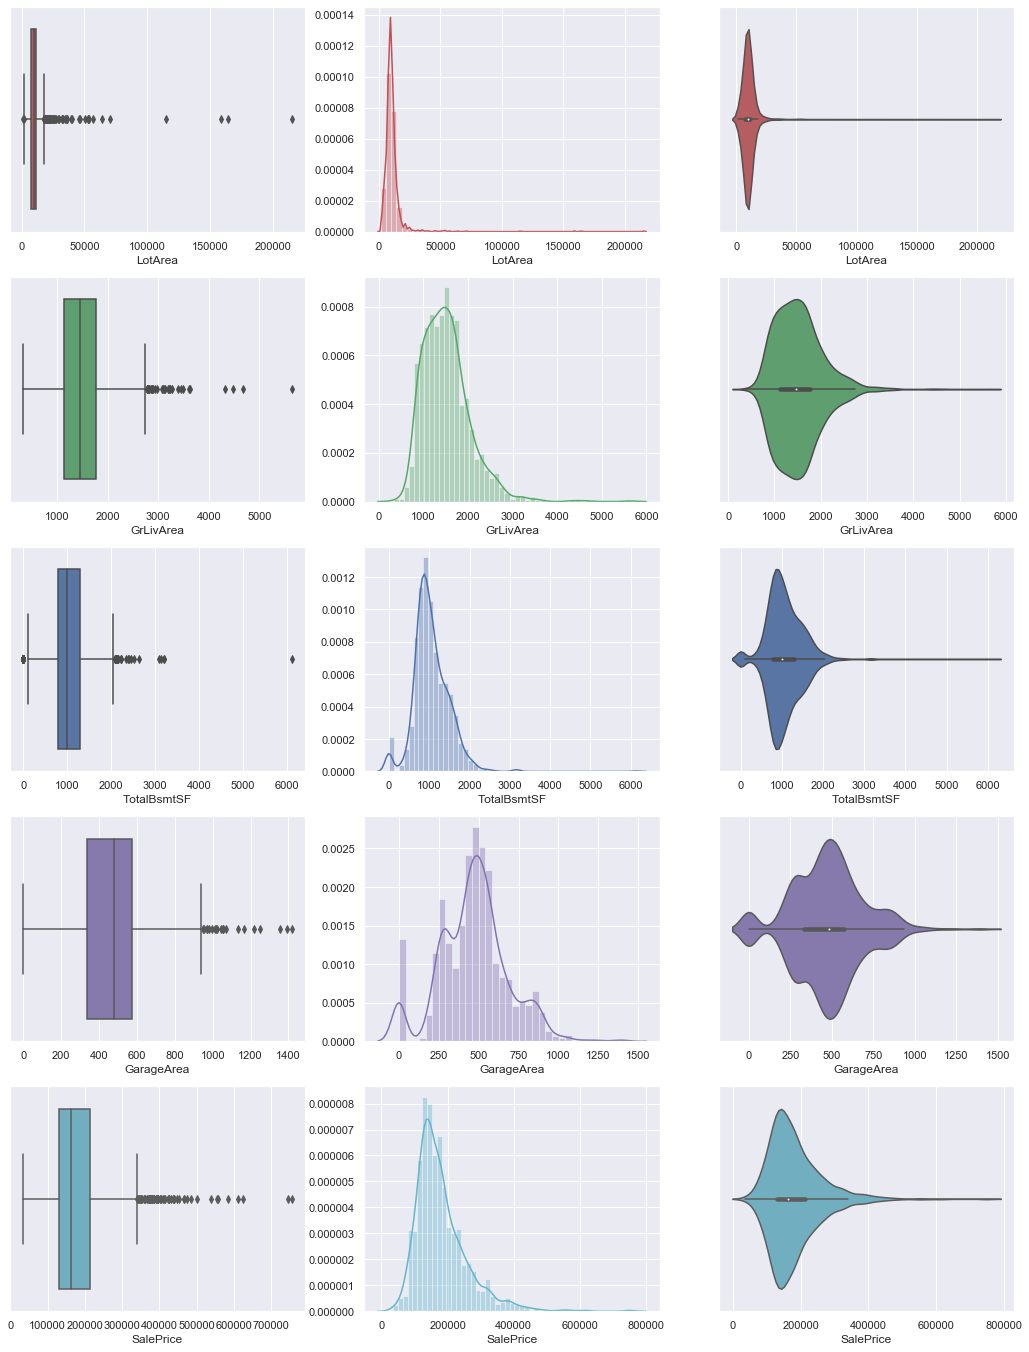

In [9]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in houseNumData:
    sb.boxplot(houseNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(houseNumData[var], color = colors[count], ax = axes[count,2])
    count += 1

In [10]:
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


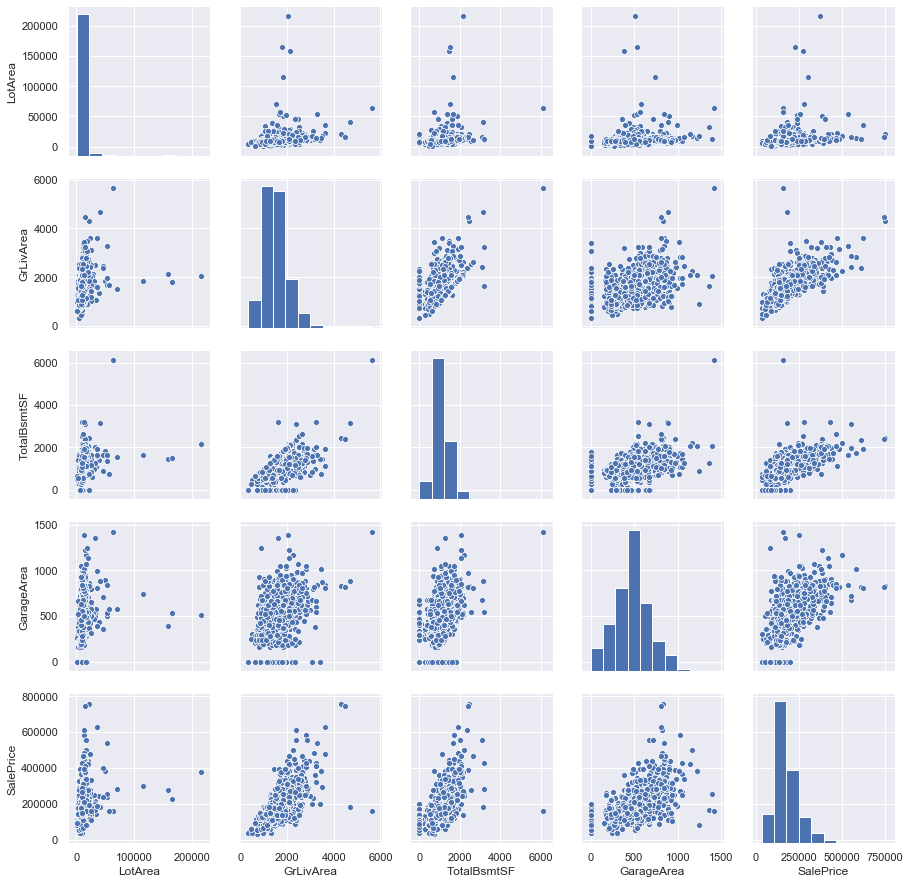

In [14]:
sb.pairplot(data = houseNumData)

In [24]:
saleprice = pd.DataFrame(houseNumData['SalePrice'])
grlivarea = pd.DataFrame(houseNumData['GrLivArea'])

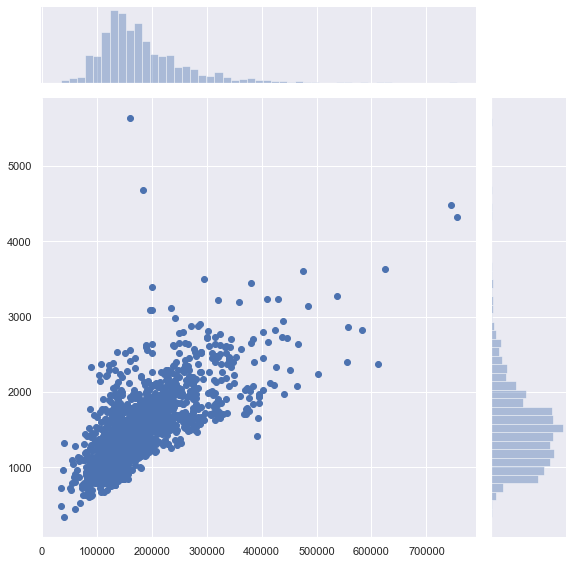

In [25]:
sb.jointplot(x = saleprice, y = grlivarea, height = 8)

In [23]:
## Problem 2 ##

In [19]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [20]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass      1460 non-null int64
Neighborhood    1460 non-null object
BldgType        1460 non-null object
OverallQual     1460 non-null int64
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


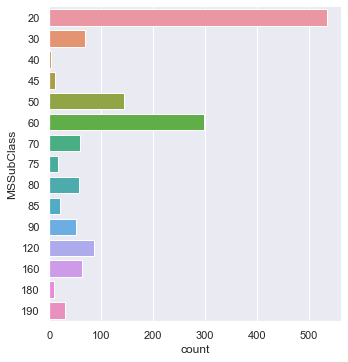

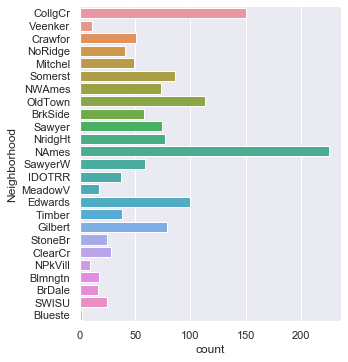

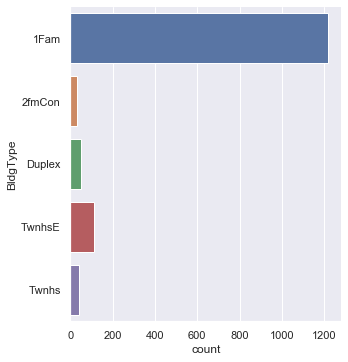

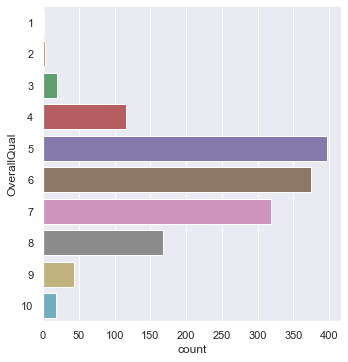

In [22]:
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count")
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count")
sb.catplot(y = "BldgType", data = houseCatData, kind = "count")
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count")

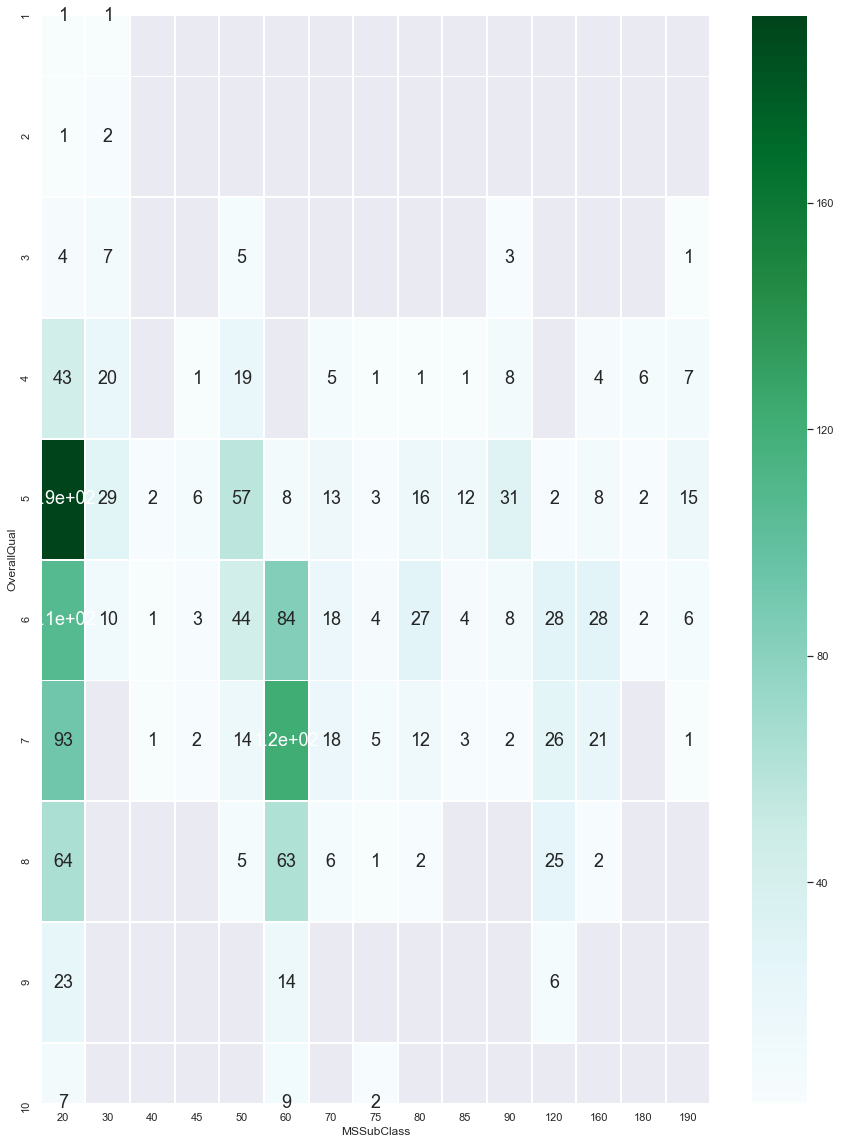

In [26]:
f, axes = plt.subplots(1, 1, figsize=(15, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

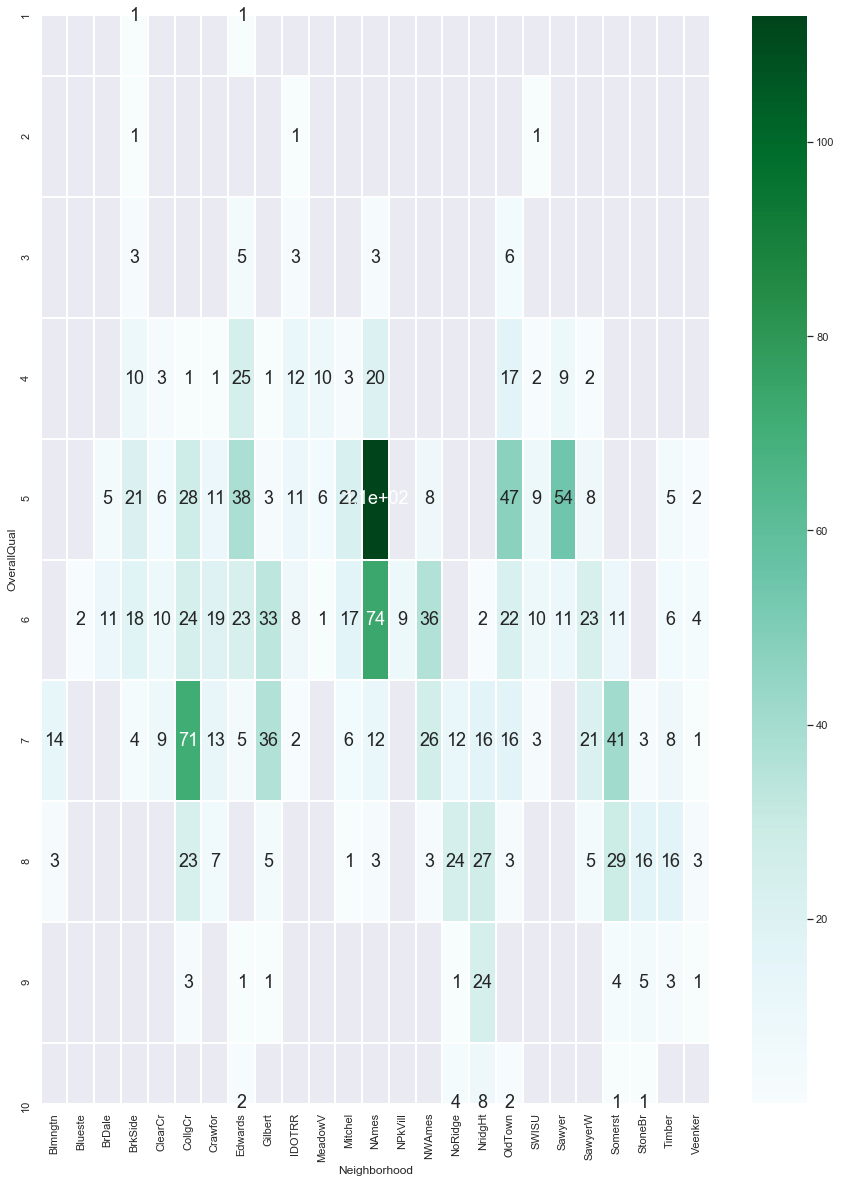

In [27]:
f, axes = plt.subplots(1, 1, figsize=(15, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

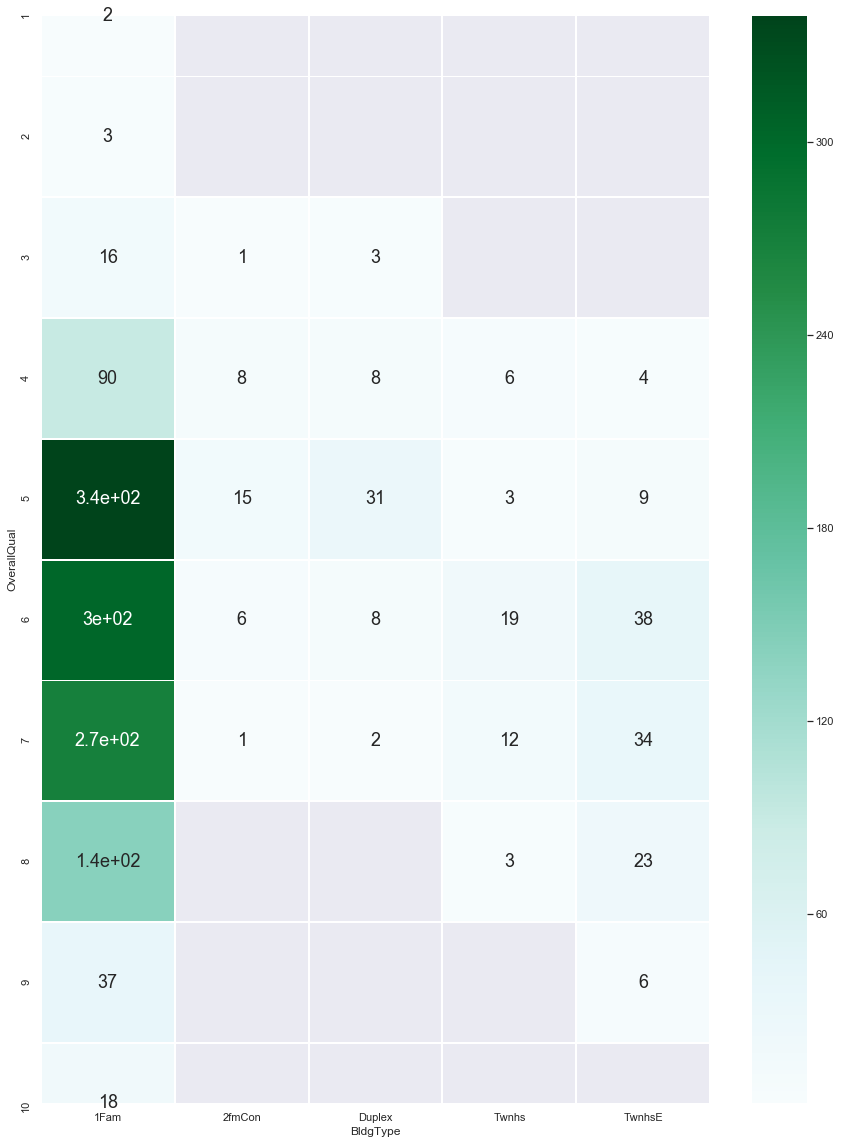

In [28]:
f, axes = plt.subplots(1, 1, figsize=(15, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

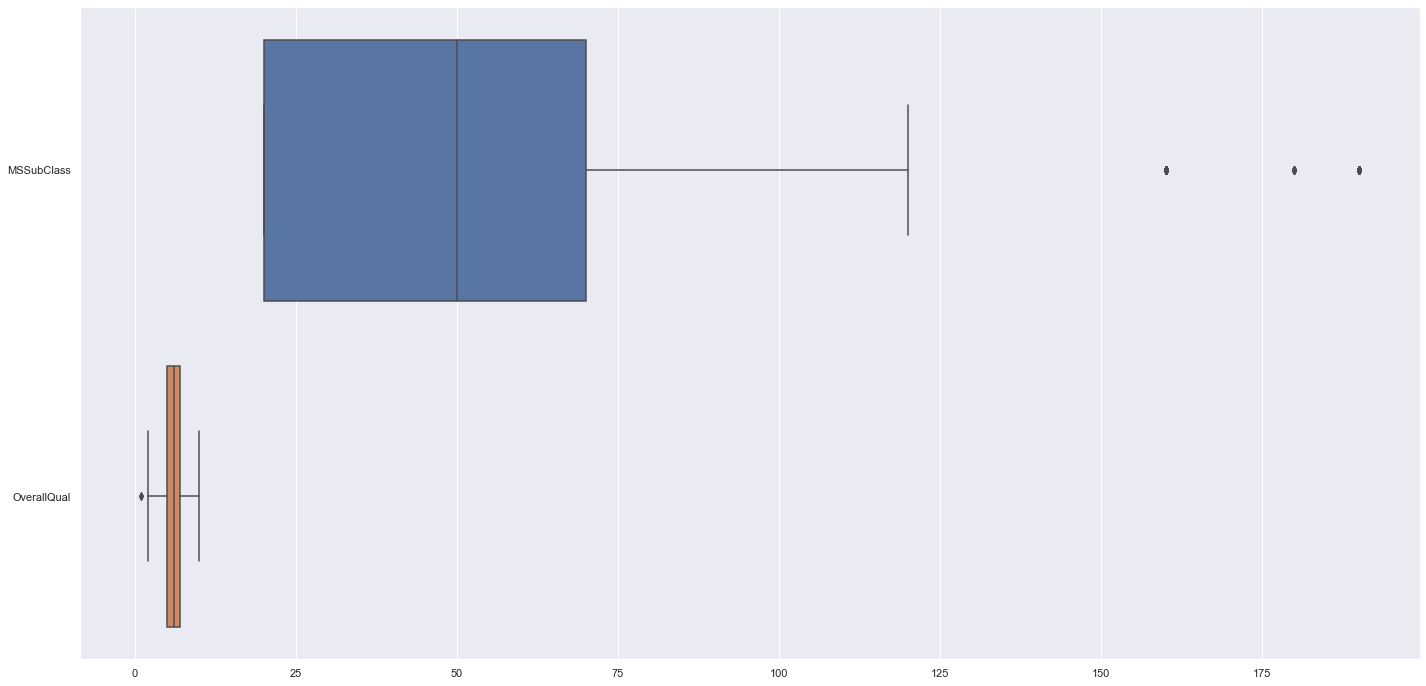

In [30]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = houseCatData, orient = "h")

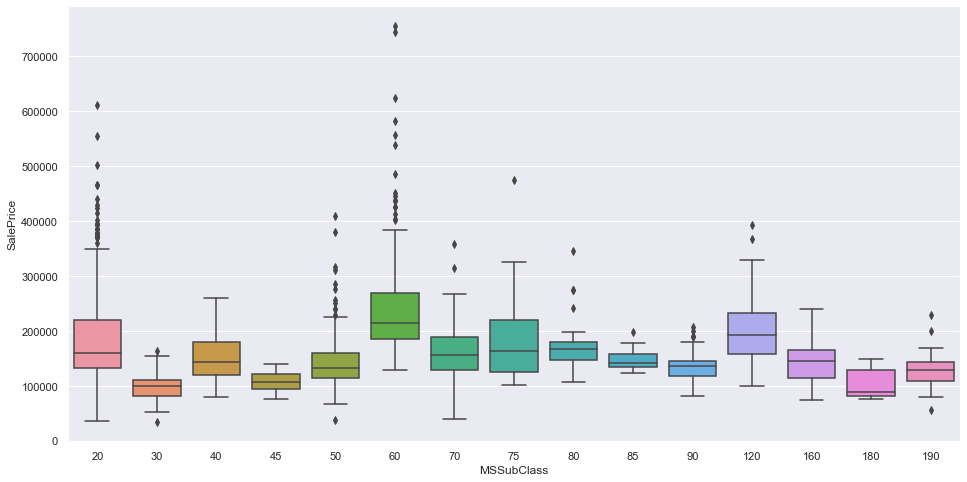

In [33]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x=houseCatData["MSSubClass"], y=houseNumData["SalePrice"])

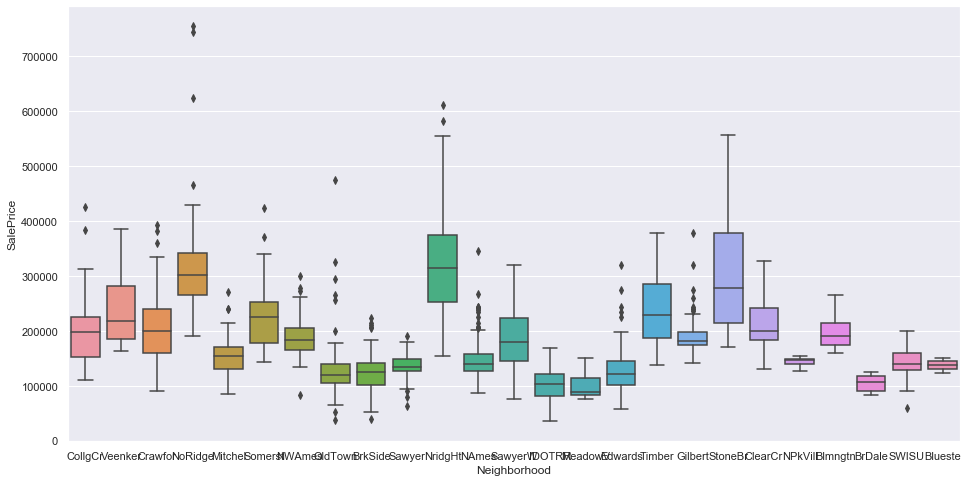

In [34]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x=houseCatData["Neighborhood"], y=houseNumData["SalePrice"])

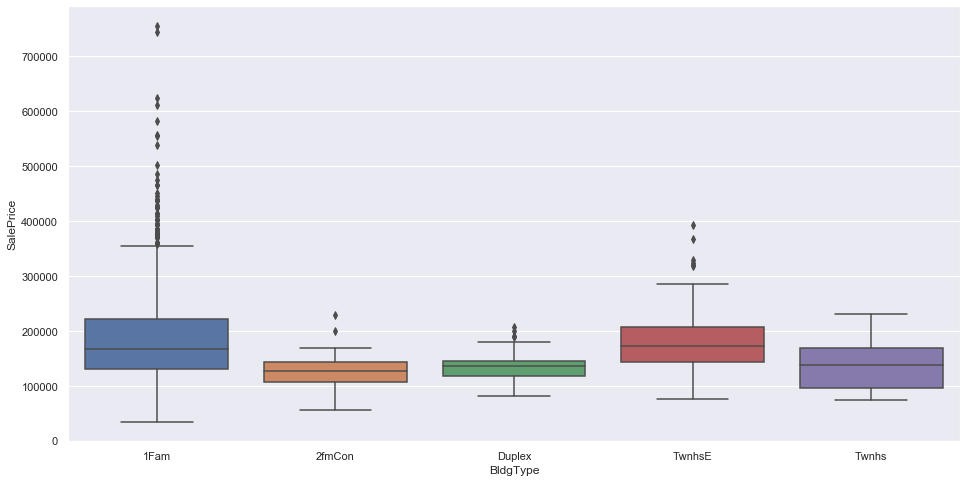

In [36]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x=houseCatData["BldgType"], y=houseNumData["SalePrice"])

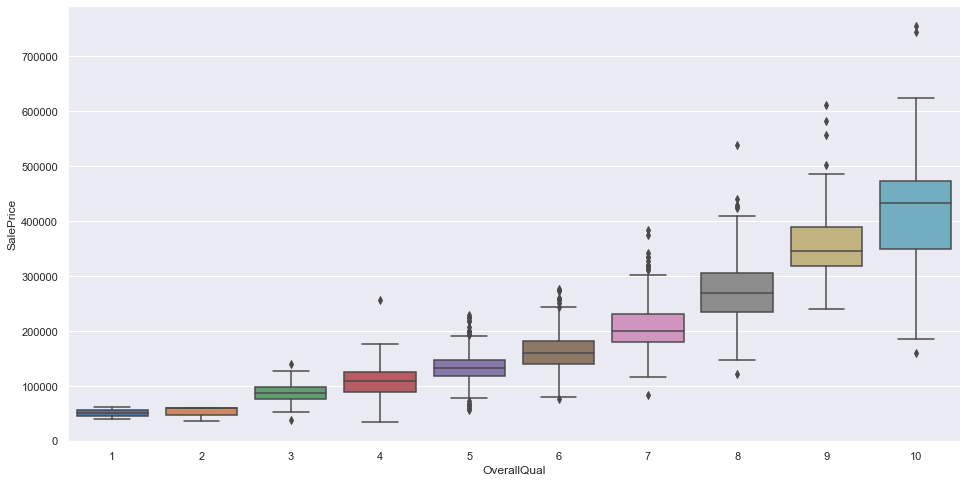

In [37]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x=houseCatData["OverallQual"], y=houseNumData["SalePrice"])